# Collective progress

**Example notebook for creating anonymised, collective information on progress**

* Before running this notebook, you need to prepare the data you want to assess. To do so, please use the notebooks  "prepare-PRIMAP-hist-data-for-collective-progress-plots.ipynb" or "prepare-PRIMAP-data.ipynb" in case the data you need is not yet available.
* For testing, some example data is available in the folder "proc_data"
* Enter the name of the file that you wish to use in the second cell and some of the plotting parameters. After that you can run the full notebook with minimal changes. 

In [1]:
# import modules

# system 
import re
import os

# calculation
import pandas as pd
import numpy as np

# plotting
%matplotlib inline
import seaborn
import matplotlib

# global stocktake tools
from gst_tools.make_plots import *
import gst_tools.gst_utils as utils


In [2]:
# USER INPUT

# First, choose which file you want to plot the data for
data_file_name = 'PRIMAP-hist_v2.3.1_CO2-total-excl-LU.csv'


# other options include...
# 'PRIMAP-hist_v2.0_KyotoGHG-AR4-total-excl-LU.csv'
# 'UN-population-data-2017.csv'
# 'PRIMAP-hist_v2.0_Energy-CO2.csv'
# 'PRIMAP-hist_UN-2017_calc__CO2-per-population.csv'
# 'PRIMAP-hist_UN-2017_calc_CO2-total-excl-LU-per-population.csv'
# 'WDI2017_GDP-PPP.csv'

# Second, choose which years you are interested in analysing
years_of_interest = ['1990', '2005', '2016']

# Third, update data description display names!
# TODO - default to automatic if not specified.
variable_name_to_display = 'Total CO2 emissions excl. LULUCF'
data_source_to_display = 'PRIMAP-hist'

# Save plots?
# Set the following to True if plots should be saved. 
# If False, plots will be shown on screen but not saved to a file.
save_opt = False

In [3]:
# DATA READING AND PREP

# read the data from file 
fname_in = os.path.join('proc-data', data_file_name)
data = pd.read_csv(fname_in)

# Check the data format
if not utils.verify_data_format(data):
    print('WARNING: The data is not correctly formatted! Please check before continuing!')

# extract the key information
variable = data['variable'].unique()[0]
unit = data['unit'].unique()[0]

# tidy up for next stesps
data_years = utils.set_countries_as_index(data)
data_years = data_years.dropna(axis=1, how='all')
data_years = data_years.dropna(axis=0, how='any')

# remove comment below to display the data
#data_years

---------
Making  CO2-total-excl-LU-absolute-1990 plot.
---------
-----------
Identifying and removing outliers
lower outliers are:
Series([], Name: 1990, dtype: float64)
upper outliers are: 
country
AUS     278000.0
BRA     225000.0
CAN     459000.0
CHN    2530000.0
DEU    1050000.0
ESP     231000.0
FRA     402000.0
GBR     601000.0
IND     649000.0
IRN     214000.0
ITA     440000.0
JPN    1160000.0
KAZ     281000.0
KOR     268000.0
MEX     321000.0
POL     377000.0
RUS    2550000.0
UKR     706000.0
USA    5250000.0
ZAF     274000.0
Name: 1990, dtype: float64
---


c:\users\leonardonascimento\pycharmprojects\performance-distribution-tools\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


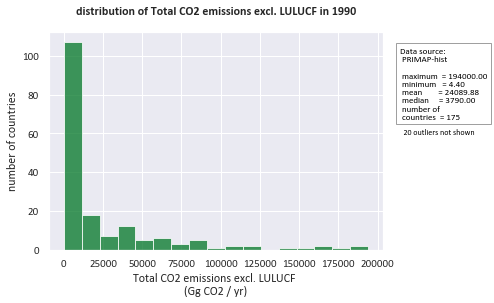

---------
Making  CO2-total-excl-LU-absolute-2005 plot.
---------
-----------
Identifying and removing outliers
lower outliers are:
Series([], Name: 2005, dtype: float64)
upper outliers are: 
country
AUS     386000.0
BRA     383000.0
CAN     577000.0
CHN    6030000.0
DEU     867000.0
ESP     370000.0
FRA     430000.0
GBR     571000.0
IDN     399000.0
IND    1200000.0
IRN     474000.0
ITA     502000.0
JPN    1290000.0
KOR     511000.0
MEX     435000.0
POL     322000.0
RUS    1570000.0
SAU     360000.0
TUR     266000.0
UKR     313000.0
USA    6240000.0
ZAF     414000.0
Name: 2005, dtype: float64
---


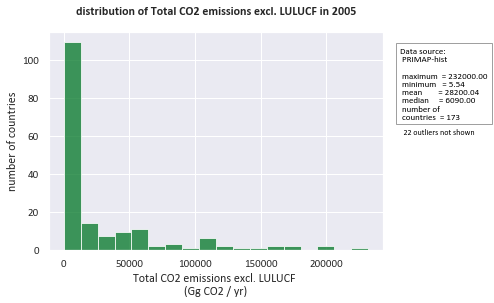

---------
Making  CO2-total-excl-LU-absolute-2016 plot.
---------
-----------
Identifying and removing outliers
lower outliers are:
Series([], Name: 2016, dtype: float64)
upper outliers are: 
country
AUS      411000.0
BRA      499000.0
CAN      560000.0
CHN    10300000.0
DEU      801000.0
ESP      261000.0
FRA      352000.0
GBR      400000.0
IDN      572000.0
IND     2280000.0
IRN      663000.0
ITA      358000.0
JPN     1200000.0
KAZ      289000.0
KOR      657000.0
MEX      504000.0
MYS      271000.0
POL      322000.0
RUS     1660000.0
SAU      511000.0
THA      295000.0
TUR      404000.0
USA     5330000.0
ZAF      464000.0
Name: 2016, dtype: float64
---


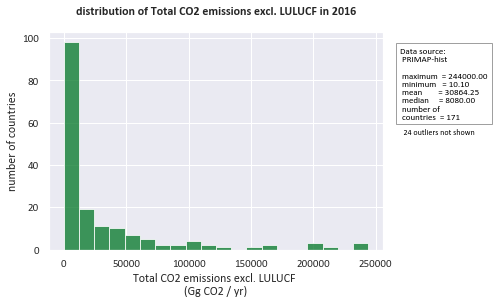

In [4]:
# Plot 1 - make a histogram of absolute data

# how should the xaxis be labelled?
xaxlabel = variable_name_to_display

# make a plot for each year
for selected_year in years_of_interest:
    
    title = 'distribution of ' + variable_name_to_display + ' in ' + str(selected_year)
    
    make_histogram(data_years[selected_year], unit,
                   xlabel=xaxlabel, title=title, 
                   sourcename=data_source_to_display,
                   remove_outliers=True, ktuk=3,
                   save_plot=save_opt, plot_name=(variable + '-' + 'absolute' + '-' + str(selected_year)))


Averaging trend over 5 years.
---------
Making  CO2-total-excl-LU-rolling-average plot.
---------
-----------
Identifying and removing outliers
lower outliers are:
Series([], Name: 2019, dtype: float64)
upper outliers are: 
country
KHM    23.576620
LAO    46.593780
NPL    18.484147
Name: 2019, dtype: float64
---
bins set to range(-20, 20, 2)


c:\users\leonardonascimento\pycharmprojects\performance-distribution-tools\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


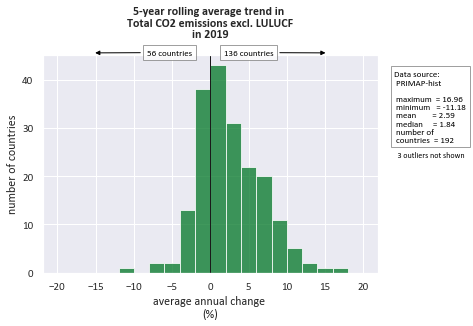

In [5]:
# Plot 2 - trends

# Calculate trends from the absolute data
# trends - % change in any given year
# rolling_trends - % annual change averaged over the specifiied number of years (here 5 is recommended)
# trends_unit - unit of the trend, here % change
trends, rolling_trends, trends_unit = utils.calculate_trends(data_years, num_years_trend=5)

# define some labels for the plots
trends_variable = 'average annual change' 
thistitle = "5-year rolling average trend in \n" + variable_name_to_display + "\nin " + str(data_years.columns[-1])

# make a plot showing the trend in the final year of available data
make_histogram(rolling_trends.iloc[:,-1], trends_unit, 
               xlabel=trends_variable,
               title=thistitle,
               remove_outliers=True, ktuk=2,
               sourcename=data_source_to_display, 
               save_plot=save_opt, plot_name=(variable + '-' + 'rolling-average'))


Calculating difference compared to 1990
Calculating difference compared to 2005
---------
Making  CO2-total-excl-LU-change-since-1990-in-1990 plot.
---------
---------
All values in the series are the same! Exiting plotting routine for CO2-total-excl-LU-change-since-1990-in-1990
---------
---------
Making  CO2-total-excl-LU-change-since-1990-in-2005 plot.
---------
-----------
Identifying and removing outliers
lower outliers are:
Series([], Name: 2005, dtype: float64)
upper outliers are: 
country
GNQ    13585.847589
MDV      542.105263
Name: 2005, dtype: float64
---
bins set to range(-456, 456, 38)


c:\users\leonardonascimento\pycharmprojects\performance-distribution-tools\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


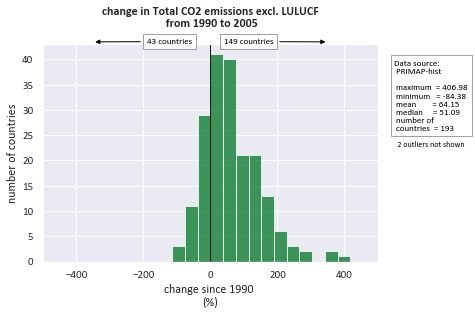

---------
Making  CO2-total-excl-LU-change-since-1990-in-2016 plot.
---------
-----------
Identifying and removing outliers
lower outliers are:
Series([], Name: 2016, dtype: float64)
upper outliers are: 
country
BTN     1238.582677
GNQ    10117.729393
LAO     2711.320755
MDV     1329.824561
NPL     1070.960187
VNM      979.069767
Name: 2016, dtype: float64
---
bins set to range(-952, 952, 68)


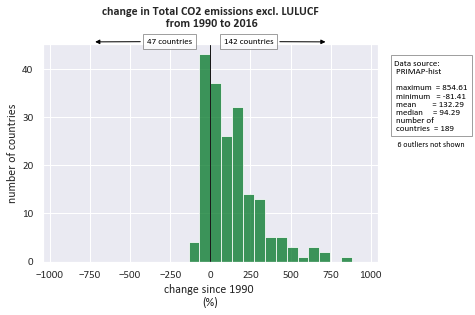

---------
Making  CO2-total-excl-LU-change-since-2005 plot.
---------
bins set to range(-1860, 1860, 30)


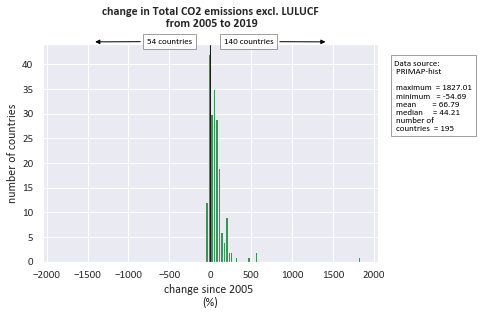

---------
Making  CO2-total-excl-LU-change-since-2005-excl-outliers plot.
---------
-----------
Identifying and removing outliers
lower outliers are:
Series([], Name: 2019, dtype: float64)
upper outliers are: 
country
AFG     552.000000
KHM     563.120567
LAO    1827.007299
NPL     453.745928
Name: 2019, dtype: float64
---
bins set to range(-348, 348, 29)


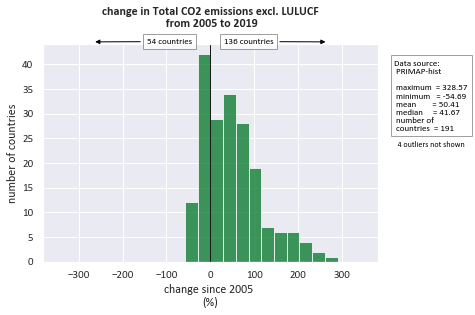

In [6]:
# Plot 3 - change since year X

# run calculations - dataframe of differences in all years relative to the specified year
# the function returns both absolute and relative (%) values
df_abs_diff_1990, df_perc_diff_1990 = utils.calculate_diff_since_yearX(data_years, '1990')
df_abs_diff_2005, df_perc_diff_2005 = utils.calculate_diff_since_yearX(data_years, '2005')

# make plots

# a few selected years; difference from 1990
for selected_year in years_of_interest:
    make_histogram(df_perc_diff_1990[selected_year], "%", 
                   xlabel='change since 1990', 
                   title=('change in ' + variable_name_to_display + '\n from 1990 to ' + str(selected_year)), 
                   sourcename=data_source_to_display,
                   remove_outliers=True, ktuk=3, 
                   save_plot=save_opt, plot_name=(variable + '-' + 'change-since-1990' + '-in-' + str(selected_year)))

    
# decrease in the last year as compared to 2005 
make_histogram(df_perc_diff_2005.iloc[:,-1], '%', 
               xlabel='change since 2005', 
               title=('change in ' + variable_name_to_display + '\n from 2005 to ' + str(df_perc_diff_2005.columns[-1])), 
               sourcename=data_source_to_display,
               remove_outliers=False, 
               save_plot=save_opt, plot_name=(variable + '-' + 'change-since-2005'))

# same plot, but removing outliers to show difference...
make_histogram(df_perc_diff_2005.iloc[:,-1], '%', 
               xlabel='change since 2005', 
               title=('change in ' + variable_name_to_display + '\n from 2005 to ' + str(df_perc_diff_2005.columns[-1])), 
               sourcename=data_source_to_display,
               remove_outliers=True, 
               save_plot=save_opt, plot_name=(variable + '-' + 'change-since-2005-excl-outliers'))


## Below here is space for code for testing and debugging!

In [ ]:
# show example data
data.columns


In [ ]:
data_1 = data
data_1 = data_1.dropna(axis=1, how='all')
data_1 = data_1.dropna(axis=0, how='any')
data_1

In [ ]:
data.loc[data['country'] == 'AFG']
